###  Assinatura

Imagine que você tenha que anexar uma assinatura virtual e uma imagem. O objetivo dessa aula é mostrar uma forma simples de usar operações bit a bit para automatizar esse trabalho.


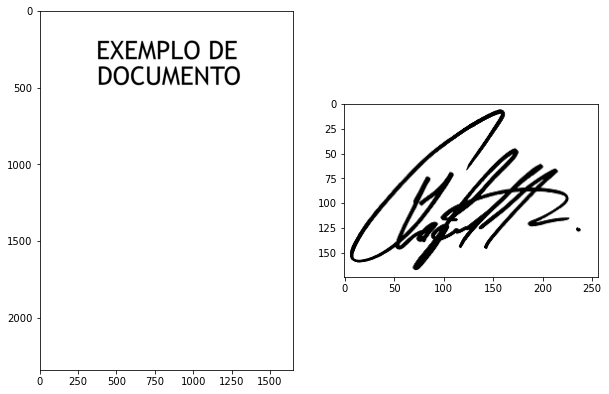

In [4]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

path = os.getcwd()
img = cv2.imread(path + r'\assinatura\exemplo_doc.png', cv2.IMREAD_UNCHANGED)

# Fazer a copia do pdf-imagem
img1 = img.copy()

# ler a assinatura
img2 = cv2.imread(path + r'\assinatura\ex_assinatura.png')

# Plot da imagem
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.show()


In [5]:
# Posicao da assinatura. No caso no top-left
rows,cols,channels = img2.shape
print(f"Assinatura: {rows} pixels de altura e {cols} de largura")

# Determinar o ROI que a assinatura irá ficar
roi = img1[100:rows+100, 100:cols+100]

Assinatura: 175 pixels de altura e 256 de largura


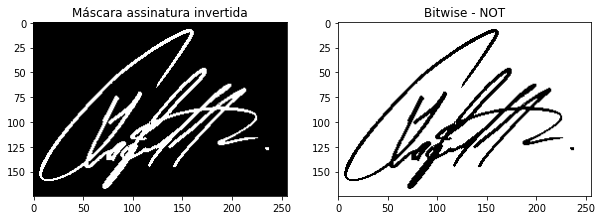

In [9]:
# Processamento para insercao da assinatura
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY_INV)

# Uso do bitwise NOT para inverter os pixels
mask_inv = cv2.bitwise_not(mask)
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara assinatura invertida')


plt.subplot(1,2,2)
plt.imshow(mask_inv, cmap='gray')
plt.title('Bitwise - NOT')
plt.show()

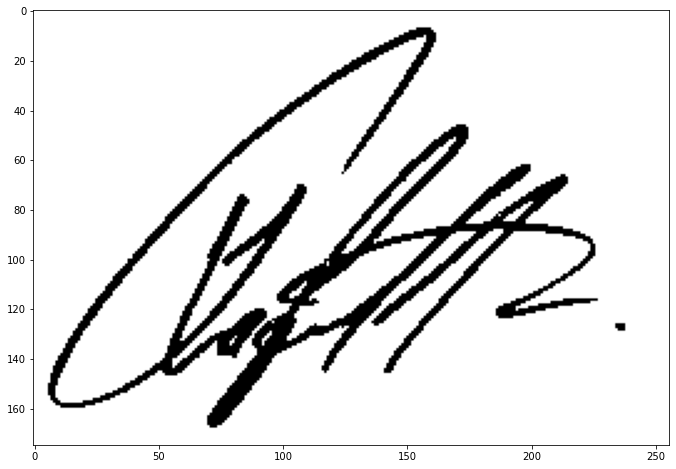

In [10]:
# Uso do bitwise AND para pegar os pixels em comum das máscaras criadas
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
plt.figure(figsize=(16,8))
plt.imshow(img1_bg)
plt.show()


In [13]:
# Apenas a regiao da assinatura da imagem da assinatura
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)


# Coloque a assinatura no ROI e modifique a imagem principal
dst1 = cv2.add(img1_bg,img2_fg)
img1[2000:rows+2000, 500:cols+500 ] = dst1

plt.figure(figsize=(20,10))
plt.imshow(img1)
plt.show()

ValueError: could not broadcast input array from shape (175,256,3) into shape (339,256,3)